# Demo: Usage of Keras models

How to load and predict with a trained keras model

In [1]:
import sys, os
ROOT_PATH = os.path.abspath(".").split("src")[0]
module_path = os.path.abspath(os.path.join(ROOT_PATH+"/src/utils/"))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc 
from tabulate import tabulate

from sklearn.linear_model import LinearRegression

import keras
import tensorflow as tf
import functions as f
import dl_functions as dlf

Using TensorFlow backend.


In [2]:
# configure matplotlib params and plotting
sns.set()
sns.set_context('paper')
sns.set_style('whitegrid', {'axes.grid': True, 'grid.linestyle': '--'})

rc('figure', figsize=(12,6))
rc('xtick', labelsize=12)
rc('ytick', labelsize=12)
rc('axes', labelsize=13, titlesize=14)
rc('legend', fontsize=14, handlelength=2)
rc('font', family='serif')

SEED=100
np.random.seed(SEED)
tf.set_random_seed(SEED)

In [3]:
# read data and metadata
df_train, df_valid, df_test = f.load_data()
stats, ts, ts_train, ts_valid, ts_test = f.load_metadata()

# split datasets into features and targets
x_train, y_train = f.split_dataset(df_train.values, delay=1)
x_valid, y_valid = f.split_dataset(df_valid.values, delay=1)
x_test, y_test = f.split_dataset(df_test.values, delay=1)

# metadata
target_tags = df_train.columns.values[:3]
feature_tags = df_train.columns.values[3:]
target_stds = stats.loc[target_tags,"Std"].values

### Load the models and predict

In [4]:
lstm = keras.models.load_model(ROOT_PATH + "models/ensemble/lstm_model.h5")
mlp = keras.models.load_model(ROOT_PATH + "models/ensemble/mlp_model.h5")
lm = f.load_pickle(ROOT_PATH + "models/ensemble/linear_model.pkl")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [5]:
# predict with the ensemble model
n_pred = 50
mean_preds, std_preds, pred_matr = dlf.predict_with_ensemble(lm, lstm, mlp, 
                                                             x_test, y_test, 
                                                             n_pred=n_pred, 
                                                             return_pred_matr=True)

# --> Use this command if 'pred_matr' is not interesting to extract
#mean_preds, std_preds = dlf.predict_with_ensemble(lm, lstm, mlp,x_test, y_test, n_pred=n_pred)

print(mean_preds.shape, std_preds.shape, pred_matr.shape)

(17736, 3) (17736, 3) (50, 17736, 3)


### Plots of the predictions

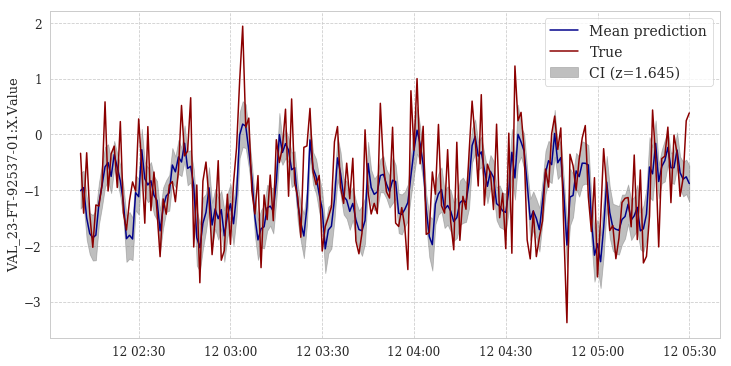

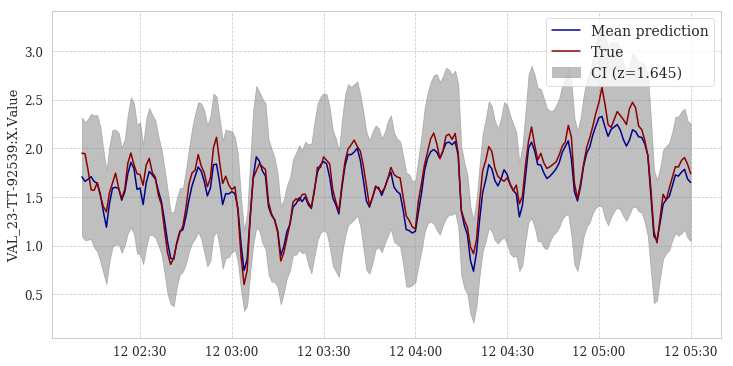

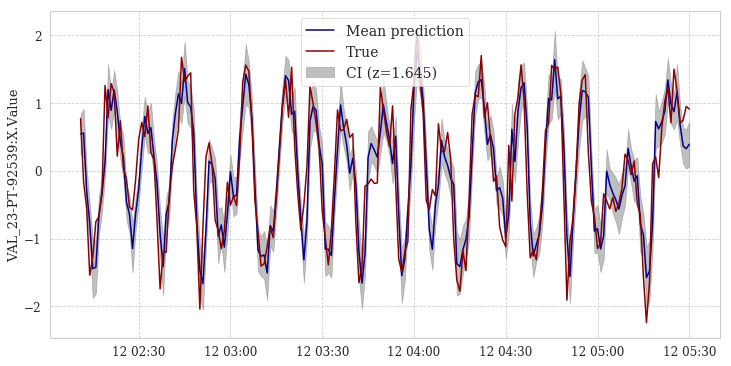

In [6]:
dlf.plot_pred_matrix(pred_matr, x_test, y_test, ts_test, target_tags,
                    start_idx=600, n_obs=200, plotCI=True, z=1.645)